We explored the machine learning workflow using the k-nearest neighbors algorithm. We chose the k-nearest neighbors algorithm because building the intuition for how the algorithm works doesn't require any mathematics. While the algorithm is easy to grasp, we can't use it for larger datasets because the model itself is **represented using the entire training set**. Each time we want to make a prediction on a new observation, we need to calculate the distance between each observation in our training set and our new observation, then rank by ascending distance. This is a computationally intensive technique!

For most of the machine learning techniques, the model is **represented as a mathematical function**. This mathematical function approximates the underlying function that describes how the features are related to the target attribute. Once we derive this mathematical function using the training dataset, making predictions on the test dataset (or on a future dataset) is computationally cheap. The following diagram shows 2 different linear regression functions that approximate the dataset (note that the values in this dataset are random).

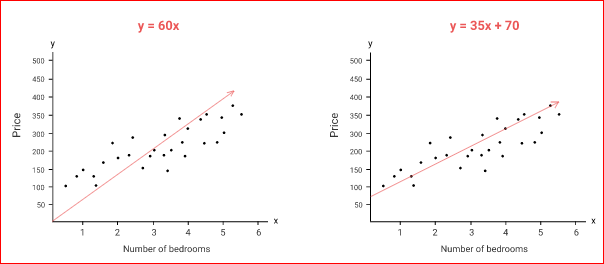

Before we can dive into using linear regression models for machine learning, we'll need to understand some key ideas from calculus. Calculus provides a framework for understanding how mathematical functions behave. Calculus helps us:

* understand the steepness at various points
* find the extreme points in a function
* determine the optimal function that best represents a dataset


Let's say we're given the following equation, which describes the trajectory of a ball after it's kicked by a football player:

$y = -(x^2) + 3x - 1$

**x** is time in seconds while

**y** is the vertical position of the ball. 

Naturally, we'd like to know the highest position the ball reached and at what time that happened. While we can graph the equation and estimate the result visually, if we want the precise time and vertical position we'll need to use calculus. 

We'll explore the different calculus concepts necessary to build up to being able to find this precise point.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

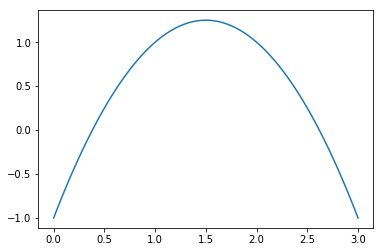

In [7]:
# Generate a NumPy array containing 100 values from 0 to 3

x = np.linspace(0,3,100)

y = -x**2 + 3*x - 1

plt.plot(x,y)
plt.show()

Before we dive into analyzing the curve of a ball's height, we'll need to understand a few key ideas first. We'll explore those concepts using simple, **straight lines** first then build up to applying those concepts to **curves**. 

A simple, straight line is more clearly defined as a **linear function**. All linear functions can be written in the following form

$y = mx + b$

For a specific linear function, `m` and `b` are constant values while `x` and `y` are variables. `y=3x+1` and `y=5` are both examples of linear function.

Let's focus on the function `y=3x+1` for now. This function multiples any `x` value we pass in by `3` then adds `1` to it.

Constant `m` determines how steep the line is. When `m` is equal to `0`, the line is completely flat and is parallel to the x-axis. When `m` and `y` are both set to `0`, the line is equivalent to the x-axis.

The `m` value controls a line's **slope** while the `b` value controls a line's **y-intercept**. The **y-intercept** is the value where the line intersects the y-axis. 

When we fixed `m` but varied `y`, we may have noticed that the point at which the line intersected the y-axis varied. The line intersects the y-axis when `x` is `0`. For `y=3x+1` , the y-intercept is `1`

While the y-intercept describes where a line intersects the y-axis, the slope describes the steepness of the line. 

* Whenever we set `m` to a positive value, the y values increased as the x values increased. 
* Whenever we set `m` to a negative value, the y values decreased as the x values increased. 
* When `m` was `0`, the y value was consistent throughout (and equivalent to the y-intercept).

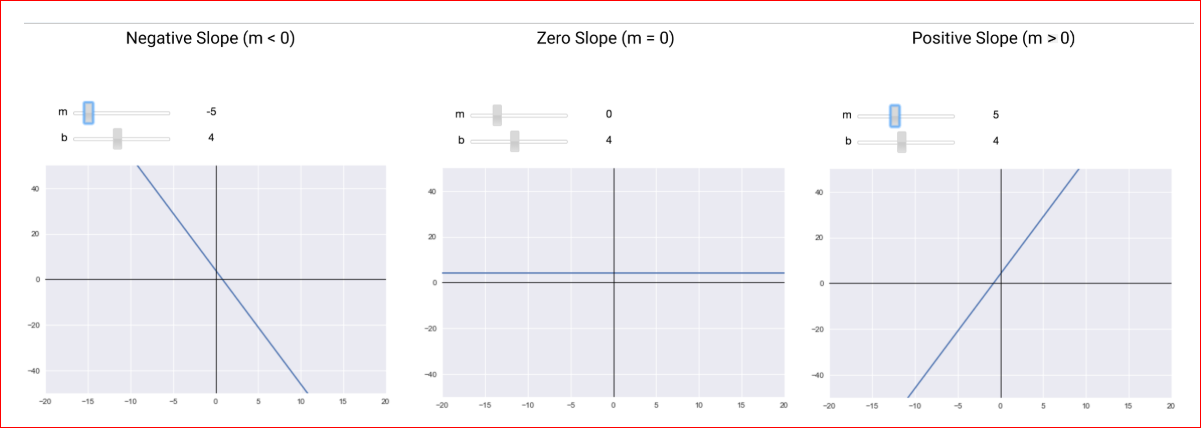

Another way to think about slope is rate of change. The rate of change is how much the y axis changes for a specific change in the x axis.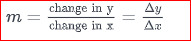

Here's the slope calculation between the points `(1,4)` and `(4,13)`, which are both points on the line `y = 3x + 1`

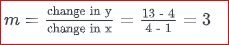

When referring to unique x and y coordinates, an integer value is usually added to the subscripts. For example, the points `(1,4)` and `(4,13)` from the last calculation can be referred to as $(x_1,y_1)$ and $(x_2,y_2)$. If we don't specify what $(x_1,y_1)$ and $(x_2,y_2)$ are, they act as variables

If we calculate the rate of change between any points on a line, it will always equal the function's slope. In the following math block, $(x_1,y_1)$ and $(x_2,y_2)$ represent any 2 coordinates on a line: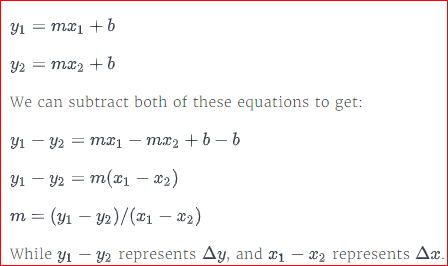

Let's now calculate the slope for a few more points that lie on `y = 3x +1`

In [16]:
# function that calculates the rate of change between any two coordinates.

def slope(x1,x2,y1,y2):
    m = (y1-y2)/(x1-x2)
    return m

In [17]:
slope_one = slope(0,4,1,13)
slope_two = slope(5,-1,16,-2)

print(slope_one)
print(slope_two)

3.0
3.0


So far, we've been working with linear functions, where we can determine the slope of the function from the equation itself. If we step back to our ball trajectory equation, however, we'll notice that it doesn't match the form `y = mx+b`:

$y = -(x^2) + 3x - 1$

This is because this function is a **nonlinear function**. Nonlinear functions don't represent straight lines -- they represent curves like the one we plotted 

The outputs y of a nonlinear function are not proportional to the input values x. An increment in x doesn't result in a constant increment in y.

Whenever x is raised to a power not equal to 1, we have a non-linear function. Here are some more examples of nonlinear functions: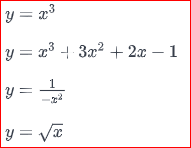

As we varied $x_1$ and $x_2$, the slope between the 2 points varied drastically. Because straight, linear functions have a constant slope throughout, we know the slope at any point on the line.

If we knew that the relationship between temperature and wind speed was linear, we could predict what the wind speed would be at any temperature by sampling two points and calculating the slope.

If the relationship was instead nonlinear, we couldn't predict what the wind speed would be at any particular temperature just by sampling 2 points and using the slope between them (because the slope changes drastically depending on which 2 points we pick). 

When we calculate the slope between 2 points on a curve, we're really calculating the slope between the line that intersects both of those points.

If we recall, the equation for a linear function is `y = mx + b`. If we know the values for `m`, `x`, and `y`, we can calculate `b`, the **y-intercept**, using some arithmetic. 

Let's walk through the calculation for the line connecting the points at the x values `0` and `1`.

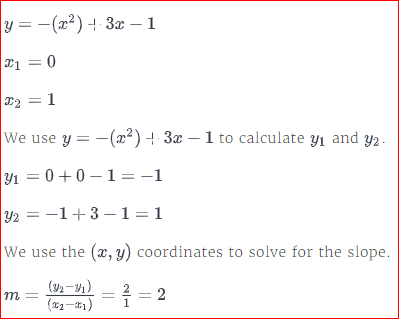

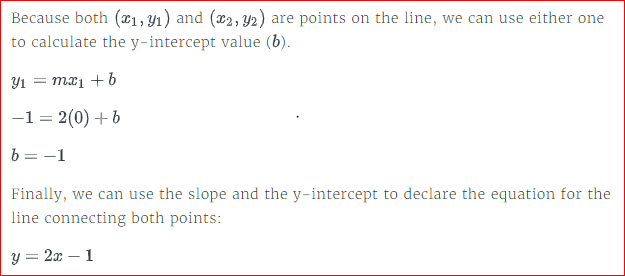

A line that intersects 2 points on a curve is known as a **secant line**.

In [1]:
# writing the function draw_secant() , which plots our nonlinear function between the 2 x-values.

import seaborn as sns
sns.set_style = "darkgrid" # or sns.set(style="darkgrid")

def draw_secant(x_values):  # x_values would be a list
    
    x = np.linspace(-20,30, 100) # x-values -20 and 30
    y = -1*(x)**2 + 3*x + 1 # 𝑦 =−(𝑥2)+3𝑥−1
    
    plt.plot(x,y) # plotting a curve
    
    x_0 = x_values[0]
    x_1 = x_values[1]
    
    y_0 = -1*(x_0)**2 + 3*x_0 -1 # 𝑦 =−(𝑥2)+3𝑥−1
    y_1 = -1*(x_1)**2 + 3*x_1 -1 # 𝑦 =−(𝑥2)+3𝑥−1
    
    m = (y_0 - y_1)/(x_0 - x_1)
    b = y_1 - m*x_1 # or b = y_0 - m*x_0
    
    
    y_secant = m*x + b  # 𝑦= mx + b # secant line
    
    plt.plot(x, y_secant, c = "green") # plotting secant line
    plt.show()

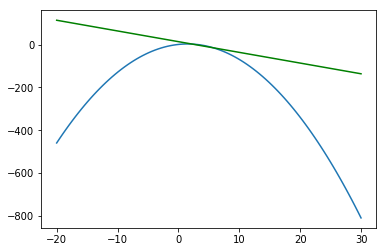

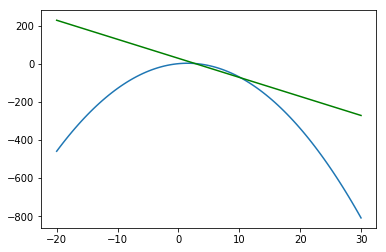

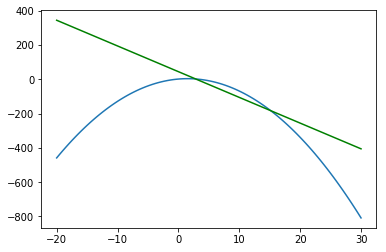

In [26]:
draw_secant([3,5])
draw_secant([3,10])
draw_secant([3,15])

We drew secant lines between the fixed $x_1$ value and increasingly larger $x_2$ values. When the gap between $x_1$ and $x_2$ was small, the secant line intersected comfortably with our curve. As we increased the gap between the two x-values, the secant line started to diverge from our curve. This observation is critical to understanding how slope works for curves.

The slope of a curve at a specific point, $x_1$ is best understood as the slope of the secant line at increasingly smaller intervals of [$x_1$,$x_2$] . The smaller the difference between $x_1$ and $x_2$, the more precise the secant line approximates the slope at that point on our curve.

When $x_1$ and $x_2$ are equivalent,the slope value is undefined. This is because division by 0 has no meaning in mathematical calculations.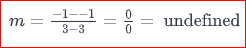

As $x_2$ approaches $x_1$ from either side of the curve, however, the slope of the secant line approaches -3. Here's a table displaying the slope values for increasingly narrow gaps between  $x_2$ and $x_1$: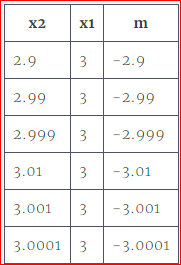

Even though we can't calculate the slope at the point where $x_2$ = $x_1$ = 3, we can tell from the table and the graph from the last step that it approaches `-3`. This value is known as the **instantaneous rate of change (occurring or done instantly.)**, because it describes the slope at a particular point. 

For linear functions, the instantaneous rate of change at any point on the line is the same. 

For nonlinear functions, the instantaneous rate of change describes the steepness of the graph of the function at a specific point.This line is known as the **tangent**, and, unlike the secant line, it only intersects our function at one point.

So far, we've been working with secant lines that connect 2 points that are increasingly close together. We can think of the tangent line as the secant line when both points are the same. 

In this project, we learned how to calculate and work with slope for linear functions and we explored how slope works for nonlinear functions. 